# Fase 2 -  Detección de ataques de ingeniería social

In [1]:
#imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")




In [2]:
df=pd.read_csv("Ransomware.csv",sep='|')

### Exploración del dataset

In [3]:
df

Name  \
0                                       memtest.exe   
1                                           ose.exe   
2                                         setup.exe   
3                                          DW20.EXE   
4                                      dwtrig20.exe   
...                                             ...   
138042  VirusShare_8e292b418568d6e7b87f2a32aee7074b   
138043  VirusShare_260d9e2258aed4c8a3bbd703ec895822   
138044  VirusShare_8d088a51b7d225c9f5d11d239791ec3f   
138045  VirusShare_4286dccf67ca220fe67635388229a9f3   
138046  VirusShare_d7648eae45f09b3adb75127f43be6d11   

                                     md5  Machine  SizeOfOptionalHeader  \
0       631ea355665f28d4707448e442fbf5b8      332                   224   
1       9d10f99a6712e28f8acd5641e3a7ea6b      332                   224   
2       4d92f518527353c0db88a70fddcfd390      332                   224   
3       a41e524f8d45f0074fd07805ff0c9b12      332                   224   
4       c87e561258f2f8650cef999bf643a731      332                   224   
...                                  ...      ...                   ...   
138042  8e292b418568d6e7b87f2a32aee7074b      332                   224   
138043  260d9e2258aed4c8a3bbd703ec895822      332                   224   
138044  8d088a51b7d225c9f5d11d239791ec3f      332                   224   
138045  4286dccf67ca220fe67635388229a9f3      332                   224   
138046  d7648eae45f09b3adb75127f43be6d11      332                   224   

        Characteristics  MajorLinkerVersion  MinorLinkerVersion  SizeOfCode  \
0                   258                   9                   0      361984   
1                  3330                   9                   0      130560   
2                  3330                   9                   0      517120   
3                   258                   9                   0      585728   
4                   258                   9                   0      294912   
...                 ...                 ...                 ...         ...   
138042              258                  11                   0      205824   
138043            33167                   2                  25       37888   
138044              258                  10                   0      118272   
138045            33166                   2                  25       49152   
138046              258                  11                   0      111616   

        SizeOfInitializedData  SizeOfUninitializedData  ...  ResourcesNb  \
0                      115712                        0  ...            4   
1                       19968                        0  ...            2   
2                      621568                        0  ...           11   
3                      369152                        0  ...           10   
4                      247296                        0  ...            2   
...                       ...                      ...  ...          ...   
138042                 223744                        0  ...            7   
138043                 185344                        0  ...           26   
138044                 380416                        0  ...           22   
138045                  16896                        0  ...           10   
138046                 468480                        0  ...            4   

        ResourcesMeanEntropy  ResourcesMinEntropy  ResourcesMaxEntropy  \
0                   3.262823             2.568844             3.537939   
1                   4.250461             3.420744             5.080177   
2                   4.426324             2.846449             5.271813   
3                   4.364291             2.669314             6.400720   
4                   4.306100             3.421598             5.190603   
...                      ...                  ...                  ...   
138042              4.122736             1.370260             7.677091   
138043              3.377663   

In [4]:
print("La cantidad de registros del dataset es: ", len(df.index))

La cantidad de registros del dataset es:  138047


In [5]:
df.dtypes

Name                            object
md5                             object
Machine                          int64
SizeOfOptionalHeader             int64
Characteristics                  int64
MajorLinkerVersion               int64
MinorLinkerVersion               int64
SizeOfCode                       int64
SizeOfInitializedData            int64
SizeOfUninitializedData          int64
AddressOfEntryPoint              int64
BaseOfCode                       int64
BaseOfData                       int64
ImageBase                      float64
SectionAlignment                 int64
FileAlignment                    int64
MajorOperatingSystemVersion      int64
MinorOperatingSystemVersion      int64
MajorImageVersion                int64
MinorImageVersion                int64
MajorSubsystemVersion            int64
MinorSubsystemVersion            int64
SizeOfImage                      int64
SizeOfHeaders                    int64
CheckSum                         int64
Subsystem                

In [6]:
#Estadísticas de cada columna
stats = df.describe()
print(stats)

             Machine  SizeOfOptionalHeader  Characteristics  \
count  138047.000000         138047.000000    138047.000000   
mean     4259.069274            225.845632      4444.145994   
std     10880.347245              5.121399      8186.782524   
min       332.000000            224.000000         2.000000   
25%       332.000000            224.000000       258.000000   
50%       332.000000            224.000000       258.000000   
75%       332.000000            224.000000      8226.000000   
max     34404.000000            352.000000     49551.000000   

       MajorLinkerVersion  MinorLinkerVersion    SizeOfCode  \
count       138047.000000       138047.000000  1.380470e+05   
mean             8.619774            3.819286  2.425956e+05   
std              4.088757           11.862675  5.754485e+06   
min              0.000000            0.000000  0.000000e+00   
25%              8.000000            0.000000  3.020800e+04   
50%              9.000000            0.000000  1.13664

In [7]:
#chequeando valores nulos
df.isnull().sum()

Name                           0
md5                            0
Machine                        0
SizeOfOptionalHeader           0
Characteristics                0
MajorLinkerVersion             0
MinorLinkerVersion             0
SizeOfCode                     0
SizeOfInitializedData          0
SizeOfUninitializedData        0
AddressOfEntryPoint            0
BaseOfCode                     0
BaseOfData                     0
ImageBase                      0
SectionAlignment               0
FileAlignment                  0
MajorOperatingSystemVersion    0
MinorOperatingSystemVersion    0
MajorImageVersion              0
MinorImageVersion              0
MajorSubsystemVersion          0
MinorSubsystemVersion          0
SizeOfImage                    0
SizeOfHeaders                  0
CheckSum                       0
Subsystem                      0
DllCharacteristics             0
SizeOfStackReserve             0
SizeOfStackCommit              0
SizeOfHeapReserve              0
SizeOfHeap

In [8]:
# 1 - legitimo
# 0 - Dañino

df.legitimate.value_counts()


0    96724
1    41323
Name: legitimate, dtype: int64

Porcentaje de archivos legítimos: 29.93%
Porcentaje de archivos infectados: 70.07%


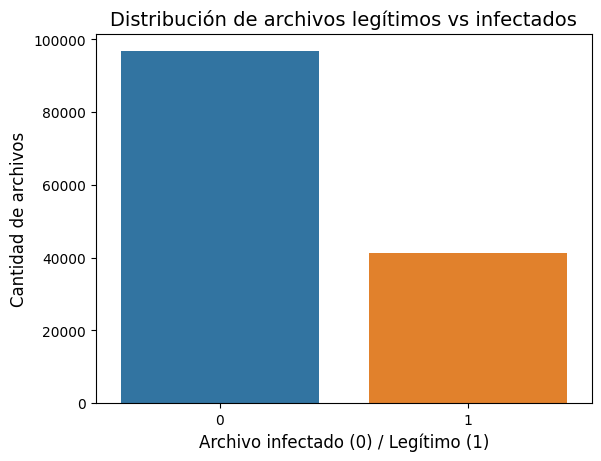

In [9]:
sns.countplot(x='legitimate', data=df)
plt.title('Distribución de archivos legítimos vs infectados', fontsize=14)
plt.xlabel('Archivo infectado (0) / Legítimo (1)', fontsize=12)
plt.ylabel('Cantidad de archivos', fontsize=12)

#Porcentaje de archivos legítimos e infectados
legit = (df['legitimate'].value_counts(normalize=True)*100)[1]
malware = (df['legitimate'].value_counts(normalize=True)*100)[0]
print('Porcentaje de archivos legítimos: {:.2f}%'.format(legit))
print('Porcentaje de archivos infectados: {:.2f}%'.format(malware))

## Pre-procesamiento

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138047 entries, 0 to 138046
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Name                         138047 non-null  object 
 1   md5                          138047 non-null  object 
 2   Machine                      138047 non-null  int64  
 3   SizeOfOptionalHeader         138047 non-null  int64  
 4   Characteristics              138047 non-null  int64  
 5   MajorLinkerVersion           138047 non-null  int64  
 6   MinorLinkerVersion           138047 non-null  int64  
 7   SizeOfCode                   138047 non-null  int64  
 8   SizeOfInitializedData        138047 non-null  int64  
 9   SizeOfUninitializedData      138047 non-null  int64  
 10  AddressOfEntryPoint          138047 non-null  int64  
 11  BaseOfCode                   138047 non-null  int64  
 12  BaseOfData                   138047 non-null  int64  
 13 

### Preprocesamiento

In [14]:
non_numeric_columns = df.select_dtypes(exclude=[np.number]).columns
df = df.drop('Name', axis=1)
df = df.drop('md5', axis=1)


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Eliminar características no relevantes (en este caso no aplicamos eliminación)
# pero se puede utilizar algún método de selección de características para eliminar
# aquellas que no aportan información relevante.

# Escalamiento y normalización
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df.drop('legitimate', axis=1))

# Separación de datos (55% entrenamiento, 15% validación y 30% pruebas)
X_train, X_test, y_train, y_test = train_test_split(scaled_df, df['legitimate'], test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1765, random_state=42)


In [17]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Técnicas de oversampling y undersampling
oversampler = SMOTE(sampling_strategy='minority')
undersampler = RandomUnderSampler(sampling_strategy='majority')

X_train, y_train = oversampler.fit_resample(X_train, y_train)
X_train, y_train = undersampler.fit_resample(X_train, y_train)


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Modelo 1: Regresión Logística
model1 = LogisticRegression()
model1.fit(X_train, y_train)

# Modelo 2: Random Forest
model2 = RandomForestClassifier()
model2.fit(X_train, y_train)

# Modelo 3: Support Vector Machines
model3 = SVC()
model3.fit(X_train, y_train)


SVC()

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    cm = confusion_matrix(y, y_pred)

    return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "confusion_matrix": cm,
    }

# Evaluación de los modelos en el conjunto de validación
model1_metrics = evaluate_model(model1, X_val, y_val)
model2_metrics = evaluate_model(model2, X_val, y_val)
model3_metrics = evaluate_model(model3, X_val, y_val)

# Imprimir las métricas
print("Model 1:", model1_metrics)
print("Model 2:", model2_metrics)
print("Model 3:", model3_metrics)


Model 1: {'accuracy': 0.9816486866791745, 'precision': 0.9623708325209592, 'recall': 0.9762658227848101, 'f1': 0.96926853215513, 'confusion_matrix': array([[11807,   193],
       [  120,  4936]])}
Model 2: {'accuracy': 0.9949577861163227, 'precision': 0.9893658920834975, 'recall': 0.9936708860759493, 'f1': 0.9915137162028813, 'confusion_matrix': array([[11946,    54],
       [   32,  5024]])}
Model 3: {'accuracy': 0.9893878986866792, 'precision': 0.9782224838140082, 'recall': 0.9861550632911392, 'f1': 0.9821727568206441, 'confusion_matrix': array([[11889,   111],
       [   70,  4986]])}


In [20]:
from sklearn.model_selection import cross_val_score

def cross_validation(model, X, y, cv=10):
    accuracy = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    precision = cross_val_score(model, X, y, cv=cv, scoring='precision')
    recall = cross_val_score(model, X, y, cv=cv, scoring='recall')
    f1 = cross_val_score(model, X, y, cv=cv, scoring='f1')
    
    return {
        "accuracy": accuracy.mean(),
        "precision": precision.mean(),
        "recall": recall.mean(),
        "f1": f1.mean(),
    }

# Evaluación cruzada de los modelos
X_full = np.concatenate((X_train, X_val))
y_full = np.concatenate((y_train, y_val))

model1_cv_metrics = cross_validation(model1, X_full, y_full)
model2_cv_metrics = cross_validation(model2, X_full, y_full)
model3_cv_metrics = cross_validation(model3, X_full, y_full)

# Imprimir las métricas de la validación cruzada
print("Model 1 CV:", model1_cv_metrics)
print("Model 2 CV:", model2_cv_metrics)
print("Model 3 CV:", model3_cv_metrics)


Model 1 CV: {'accuracy': 0.9784353004423192, 'precision': 0.9803188575077314, 'recall': 0.9739671360741458, 'f1': 0.9771307024177563}
Model 2 CV: {'accuracy': 0.9961519525226235, 'precision': 0.9945077081580076, 'recall': 0.9969760250494717, 'f1': 0.995894845996788}
Model 3 CV: {'accuracy': 0.9880593527880693, 'precision': 0.9889209501771783, 'recall': 0.9858002995045533, 'f1': 0.9873573649750609}


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b80436d8-7ca6-4569-97a7-516206dfb493' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>